# SMAI Assignment - 2

## Question - `2` : Face Recognition using Principal Component Analysis

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

### <b>Objective:</b>
This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

### <b>About the dataset:</b>  
The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)



### Tasks
1. Load dataset and divide the date into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.


#### Import Libraries

In [1]:
import os
import numpy as np
from PIL import Image

In [2]:
from zipfile import ZipFile
file_name = "ATnT.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [4]:
# Set up paths
workingDir = "ATnT"

X_train = []
y_train = []
X_test=[]
y_test=[]
for i in range(40):
    for j in range(10):
        img = Image.open(os.path.join(workingDir, f's{i+1}/{j+1}.pgm'))
        if j<8:
          X_train.append(np.array(img).flatten())
          y_train.append(i+1)
        else:
          X_test.append(np.array(img).flatten())
          y_test.append(i+1)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape)
print(X_train[0])


(320, 10304)
[48 49 45 ... 47 46 46]


In [5]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
print(X_train.shape)

320
80
320
80
(320, 10304)


#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [6]:
"""
Implement pca in the following function by taking the following arguements:
1. X(images array)
2. number of components
The function must return the eigen vectors (principal components) also termed "Eigen faces"
"""

import numpy as np
from scipy.sparse.linalg import eigsh




def pca(X,n):
  #  mean of face
    mean_face=np.mean(X, axis=0)
    # substract mean from every images of train datatset
    xmean= (X - np.mean(X, axis=0))
    # calculating covarience matrix
    covariencemat = np.cov(xmean.T)
    # eigen value and vector calculation
    eigenvals, eigenvecs = np.linalg.eigh(covariencemat)
    # sort eigen vector based on eigen value 
    eigenpairs = [(eigenvals[i], eigenvecs[:, i]) for i in range(len(eigenvals))]
    eigenpairs.sort(key=lambda x: x[0], reverse=True)
    eigenVectorsSorted = np.array([eigenpairs[i][1] for i in range(n)])
    eigenProjections = np.dot(xmean, eigenVectorsSorted.T)

    return mean_face, eigenVectorsSorted, eigenProjections







in pca function we first substract mean face from every face ,then we calculate covarience matrix, then calculate eigen vector and eigen value . 
and return first k eigen vector

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [7]:



def reconstruct_image(mean_face, eig_vectors, eigen_projections):
    reconstructed_images = []
    for i in range(len(eigen_projections)):
        weighted_sum = np.dot(eigen_projections[i], eig_vectors)
        reconstructed_image = mean_face + weighted_sum
        reconstructed_images.append(reconstructed_image)
    return reconstructed_images

we  multiply eigen projection to corresponding eigen vector and then add mean face to reconstruct

In [8]:
reconstructed_images=[]

#### Visualisation
Visualise the results for different number of principal components(pc = 5,10,100, 1000, all).

**Note:** Ensure that the images are labelled appropriately.

In [9]:

from sklearn.metrics import accuracy_score

mean_face, eig_vectors_sorted,eigenProjections = pca(X_train, 10000)


5
10304


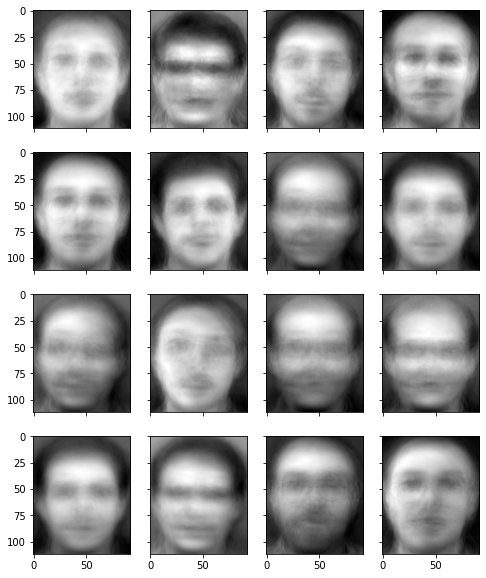

10
10304


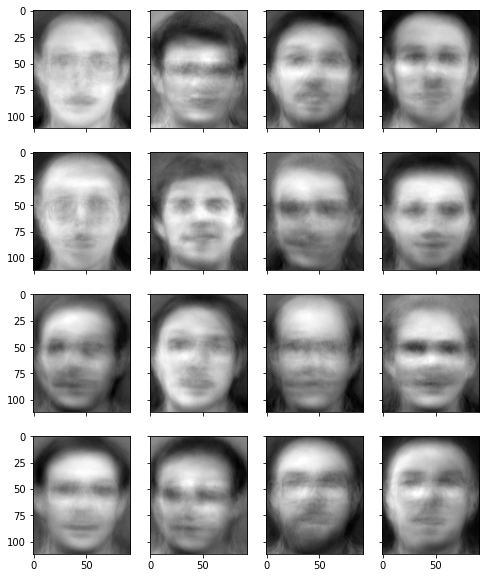

50
10304


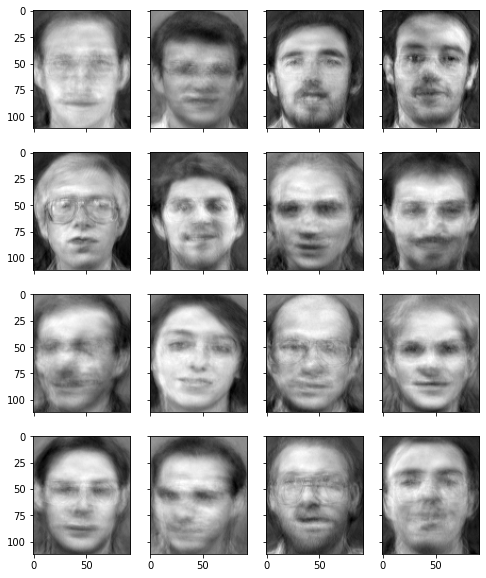

100
10304


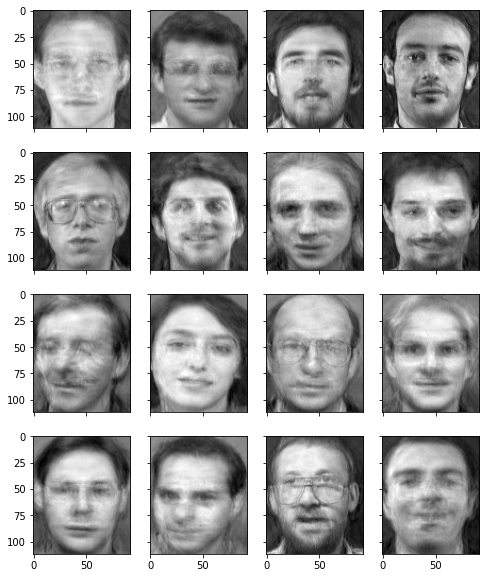

500
10304


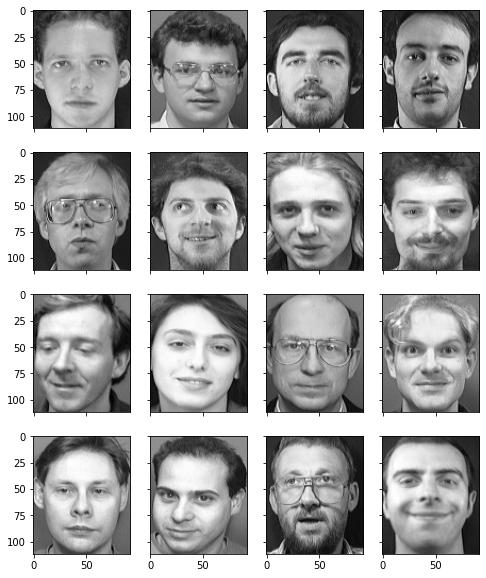

1000
10304


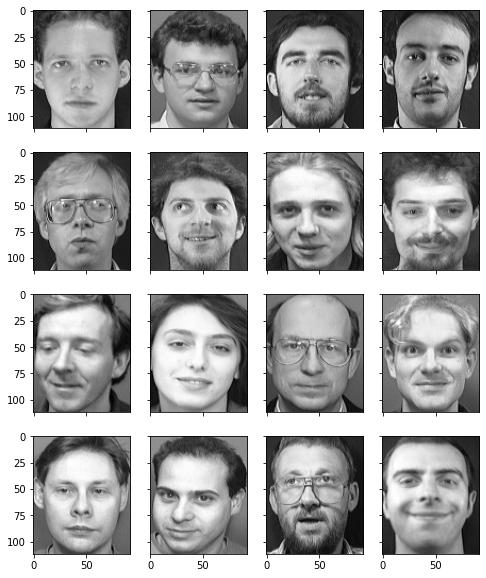

2000
10304


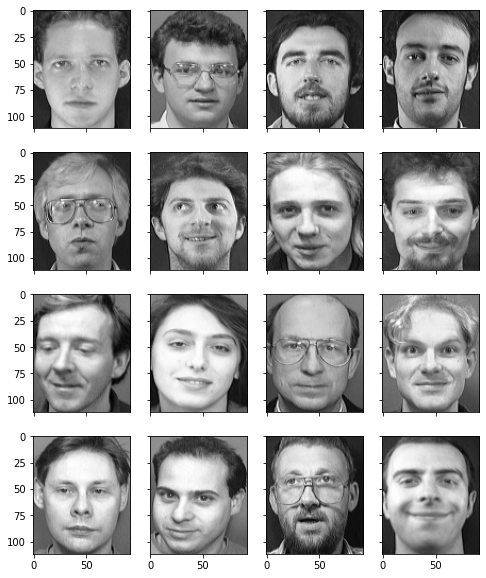

In [10]:
import matplotlib.pyplot as plt
# import 
from sklearn.metrics import accuracy_score
l=[5,10,50,100,500,1000,2000]
acc=[]
squareerror=[]
lgsquareerror=[]
for nc in l:
  print(nc)
  # mean_face, eig_vectors_sorted, eigen_projections = pca(X_train, nc)
  eigVectorsSorted = eig_vectors_sorted[0:nc]
  eigenpic=X_train-mean_face
  eigenProjection = np.dot(eigenpic, eigVectorsSorted.T)
  reconstructed_images=reconstruct_image(mean_face, eigVectorsSorted, eigenProjection)
  print(len(reconstructed_images[0]))
  fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
  # Show the first 16 eigenfaces
  for i in range(16):
      axes[i%4][i//4].imshow(reconstructed_images[i*10].reshape(112,92),cmap="gray")
  plt.show()

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [11]:
"""
Implement pca in the following function by taking the following arguements:
1. Test image
2. Eigenvectors
3. Mean Eigen Face
4. Training Set(X_train,y_train)
The function must return the following:
1. image with smallest error
2. error value
3. prediction class
"""
def model(Test_image,eigen_projections,Mean_Eigen_Face,X_train,y_train):
 
  distances = np.linalg.norm(Test_image - eigen_projections, axis=1)

  prediction_class = y_train[np.argmin(distances)]
  error=distances[np.argmin(distances)]
  imgx=y_train[np.argmin(distances)]
  return imgx,prediction_class,error

in this module we just calculate norm with every projection and also calculate error

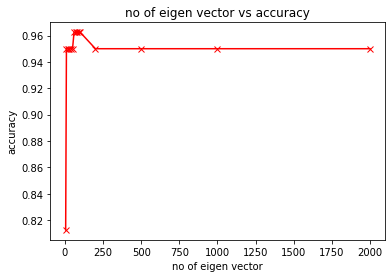

In [12]:
"""
Iterate through all the images in the test data and 
test the accurate by taking different number of components
"""
import matplotlib.pyplot as plt


from sklearn.metrics import accuracy_score
l=[5,10,20,30,40,50,60,70,80,90,100,200,500,1000,2000]
acc=[]
squareerror=[]
lgsquareerror=[]
for nc in l:
  # mean_face, eig_vectors_sorted, eigen_projections = pca(X_train, nc)
  eigVectorsSorted = eig_vectors_sorted[0:nc]
  eigenpic=X_train-mean_face
  eigenProjection = np.dot(eigenpic, eigVectorsSorted.T)

  test_data = np.dot(X_test - mean_face, eigVectorsSorted.T)
  predicted_labels = []
  errorlist=[]
  for i in range(len(test_data)):
      imgx,prediction_class,error=model(test_data[i],eigenProjection,mean_face,X_train,y_train)
      errorlist.append(error/len(test_data))
      predicted_labels.append(prediction_class)
  errval=np.sum(errorlist)/nc
  lgval=np.log(errval)
  squareerror.append(errval)
  lgsquareerror.append(lgval)
  accuracy = accuracy_score(y_test, predicted_labels)
  acc.append(accuracy)

plt.plot(l, acc, 'rx-')
plt.xlabel('no of eigen vector')
plt.ylabel('accuracy')
plt.title('no of eigen vector vs accuracy')
plt.show()

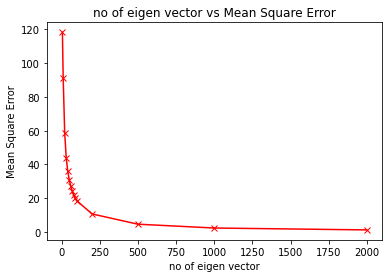

In [13]:
# Plot Number of eigenvectors vs Mean Square Error

plt.plot(l, squareerror, 'rx-')
plt.xlabel('no of eigen vector')
plt.ylabel('Mean Square Error')
plt.title('no of eigen vector vs Mean Square Error')
plt.show()

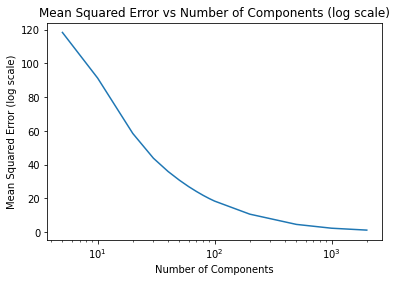

In [14]:
# Plot Number of eigenvectors vs Logarithmic Mean Square Error

plt.semilogx(l, squareerror)
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error (log scale)')
plt.title('Mean Squared Error vs Number of Components (log scale)')
plt.show()

Summarise your observations on the plots and accuracies

**Answer:**rate of error is decrease with eigen vector , and when the eigen vector number is more than 400 it will give fully clear photo


State the advantages and limitations of using PCA in general. Also state its limitations in context of face recognition

**Answer:**
advantage: it basically reduce dimensions. which is helpful for noise cancellation,feature extraction etc.
disadvantege: information loss

in case of face recognization its sensitive for illumination
